Let's load up our data, parse our date column, and drop one column that always contains the same value.

In [1]:
import pandas as pd

DATA = '/kaggle/input/earthquakes-yellowstone-mag-1-and-over/1900-2024mag1.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['time']).drop(columns=['type'])
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1973-03-25 16:33:13.100000+00:00,44.470,-110.465,10.0,3.4,mb,NaN,NaN,NaN,NaN,...,usp000012g,2014-11-06T23:21:10.470Z,"55 km ESE of West Yellowstone, Montana",NaN,NaN,NaN,NaN,reviewed,us,us
1,1973-03-28 02:39:58.300000+00:00,44.429,-110.391,8.0,5.0,mb,NaN,NaN,NaN,NaN,...,usp0000144,2014-11-06T23:21:10.560Z,"62 km ESE of West Yellowstone, Montana",NaN,NaN,NaN,NaN,reviewed,us,us
2,1973-03-28 03:02:30.100000+00:00,44.363,-110.413,10.0,4.5,mb,NaN,NaN,NaN,NaN,...,usp0000145,2014-11-06T23:21:10.561Z,"64 km ESE of West Yellowstone, Montana",NaN,NaN,NaN,NaN,reviewed,us,us
3,1973-03-28 10:07:02.900000+00:00,44.422,-110.465,10.0,4.0,mb,NaN,NaN,NaN,NaN,...,usp000014d,2014-11-06T23:21:10.573Z,"57 km ESE of West Yellowstone, Montana",NaN,NaN,NaN,NaN,reviewed,us,us
4,1973-03-30 00:32:57.600000+00:00,44.361,-110.355,11.0,4.6,mb,NaN,NaN,NaN,NaN,...,usp000015d,2018-06-04T20:43:45.000Z,"68 km ESE of West Yellowstone, Montana",NaN,NaN,NaN,NaN,reviewed,us,us


Let's make an exploratory x/y plot. Ideally we would put our data on a map, but we are working with Seaborn for the moment, so let's make the best of what we have.

In [5]:
from plotly import express

express.scatter_mapbox(mapbox_style='open-street-map', data_frame=df, lat='latitude', lon='longitude', color='mag')

<Axes: xlabel='longitude', ylabel='latitude'>

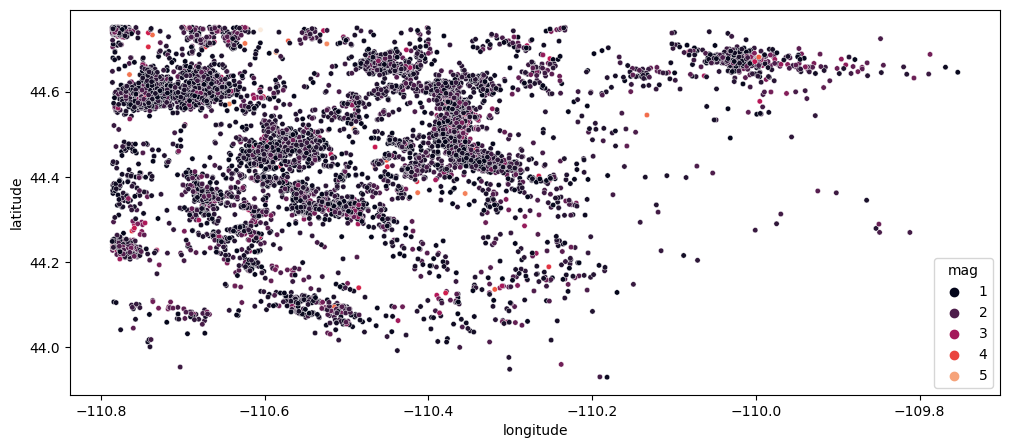

In [2]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (12, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='longitude', y='latitude', hue='mag', palette='rocket', s=15)

If we color by the magnitude, we see more or less what we would expect: because magnitudes are logarithmic, we expect to see them dominated by low values. 

Unfortunately our magnitudes are reported with multiple units. It would be nice if they mostly had the same units. How do they look?

<Axes: xlabel='longitude', ylabel='latitude'>

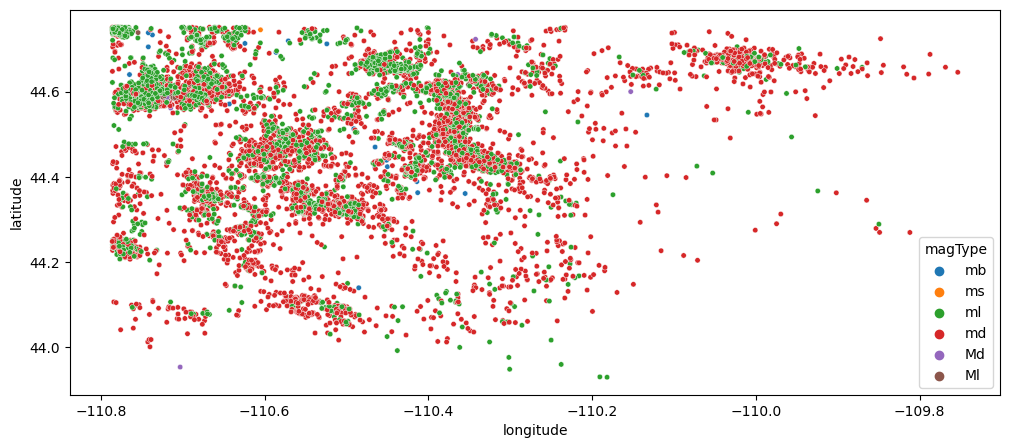

In [3]:
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='longitude', y='latitude', hue='magType', s=15)